## Summer Training Data Analysis and  Visualisation Project 

In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
dv = pd.read_csv('C:\\Users\\abhay\\Downloads\\Flight_Data.csv',encoding='unicode_escape')
# dv
dv.info()

C:\Users\abhay\AppData\Local\Temp\ipykernel_8160\103912034.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dv = pd.read_csv('C:\\Users\\abhay\\Downloads\\Flight_Data.csv',encoding='unicode_escape')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [57]:
## Copying the Data Set
df = dv.copy()

In [58]:
df.head(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,03-01-2018


In [59]:
## Data Preprocessing 
df.shape

(301206, 13)

In [60]:
df.isna().sum()

Unnamed: 0               0
airline                452
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                  200
duration               250
days_left                0
price                  100
date                300848
dtype: int64

In [61]:
all_col= df.columns
all_col

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [62]:
## Checking the Is there any column having the duplicate values or Not
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
301201    False
301202    False
301203    False
301204    False
301205    False
Length: 301206, dtype: bool

### Investigating the All columns Values...

## Price Columns should be converted from Object to Intger datatype 
## Date Columns having the apprx 90% data as null so we will drop that columns
## Removing the NA values from Columns
 # * price
 # * class
 # * destination_city
 # * duration
 # * airline


### Checking the Price Column

In [ ]:
df['price'].dtype

In [ ]:
df['price'].unique()

In [ ]:
df['price'].isna().sum()

### Checking the airline  column

In [ ]:
df['airline'].dtype

In [ ]:
df['airline'].unique()

In [ ]:
df['airline'].isna().sum()

### Checking the flight  column

In [ ]:
df['airline'].isna().sum()

In [ ]:
df['airline'].unique()

In [ ]:
df['airline'].dtype

In [10]:
df['airline'].value_counts()

airline
Vistara      128275
Air_India     81060
Indigo        43128
GO_FIRST      23176
AirAsia       16100
SpiceJet       9015
Name: count, dtype: int64

### Checking the source city column


In [11]:
df['source_city'].isna().sum()

0

In [12]:
df['source_city'].unique()


array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

### Cheking the departure_time column

In [13]:
df['departure_time'].isna().sum()

0

In [14]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

### Cheking the stops column

In [15]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [16]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [17]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [18]:
df['class'].unique()

array(['Economy', 'Business', nan], dtype=object)

In [19]:
df['duration'].unique()

array([  2.17,   2.33,   2.25,   2.08,  12.25,  16.33,  11.75,  14.5 ,
        15.67,   3.75,   2.5 ,   5.83,   8.  ,   6.  ,  14.67,  16.17,
        18.  ,  23.17,  24.17,   8.83,   4.5 ,  15.25,  11.  ,  19.08,
        22.83,  26.42,  17.75,  19.58,  26.67,  15.17,  20.83,  11.42,
        22.25,  26.  ,  21.75,   3.83,   4.42,   7.67,   8.33,  10.42,
        23.75,  19.5 ,   6.5 ,  12.42,  21.08,  28.17,  28.25,   9.25,
        17.92,   7.08,  13.83,   7.58,  15.83,  24.42,   4.17,   4.25,
         5.08,  29.33,  17.  ,  27.17,  24.75,   5.75,  12.75,  13.75,
        17.83,   5.5 ,  23.83,   5.  ,  26.5 ,  12.83,   8.92,  11.17,
        12.17,  15.58,  15.75,   7.92,  13.25,  16.  ,  22.75,   6.33,
         7.25,  30.08,  18.25,   6.08,   2.  ,  12.33,   3.5 ,  10.25,
        14.17,  25.58,   4.08,   9.75,   6.67,   9.67,  10.08,  12.58,
         7.  ,   8.25,  15.5 ,  10.17,  23.5 ,  25.75,  11.5 ,  21.42,
        14.25,   7.75,   5.33,   5.67,   4.75,  19.33,   6.25,  10.33,
      

In [20]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [21]:
df['price'].unique()

array([5953, 5956, 5955, ..., '15195', '15720', '15983'], dtype=object)

## Data Profiling
### 1- Need to change the Data Type of Price Columns
### 2- Need to remove the Na values from the Price,airline,class,duration
### 3- Renaming the Columns 1 which is unnamed 
### 4- removing the NaN value from airline  column
### 5- Setting the precission to the duration  column
### 6- replacing the values in the departure_time and arrival time column 
### 7- Converting the values of stop columns -->

## Data Cleaning
* Droping the Unnamed Column
* Droping the Date Column 
* Removing the NA values 
* Rounding Off the Decimal Values From Duration Column
* Converting the Values Of departure_time and arrival_time columnn.


In [22]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018


In [23]:
df['stops'] = df['stops'].map({'zero': 'yes', 'one': 'no'})

## Dropping the Date column


In [24]:
df.drop(['date'],axis=1,inplace = True)
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,yes,Night,Mumbai,Economy,2.17,1,5953


In [25]:
### Converting the Data Type of Price column from obj to integer.
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [26]:
df['price'].dtype

dtype('float64')

In [27]:
## Replacing the rows corresponding to the NA values in the Columns
df.dropna(subset=['price','airline','class','duration'],inplace =True)

In [28]:
df.isna().sum()

airline                 0
flight                  0
source_city             0
departure_time          0
stops               13286
arrival_time            0
destination_city        0
class                   0
duration                0
days_left               0
price                   0
dtype: int64

In [29]:
df.dropna(subset=['stops'],inplace =True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286918 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           286918 non-null  object 
 1   flight            286918 non-null  object 
 2   source_city       286918 non-null  object 
 3   departure_time    286918 non-null  object 
 4   stops             286918 non-null  object 
 5   arrival_time      286918 non-null  object 
 6   destination_city  286918 non-null  object 
 7   class             286918 non-null  object 
 8   duration          286918 non-null  float64
 9   days_left         286918 non-null  int64  
 10  price             286918 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 26.3+ MB


In [31]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,yes,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,yes,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,yes,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,yes,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,yes,Morning,Mumbai,Economy,2.33,1,5955.0


In [32]:
df['duration'] = df['duration'].round(2)
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,yes,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,yes,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,yes,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,yes,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,yes,Morning,Mumbai,Economy,2.33,1,5955.0
5,Vistara,UK-945,Delhi,Morning,yes,Afternoon,Mumbai,Economy,2.33,1,5955.0
6,Vistara,UK-927,Delhi,Morning,yes,Morning,Mumbai,Economy,2.08,1,6060.0
7,Vistara,UK-951,Delhi,Afternoon,yes,Evening,Mumbai,Economy,2.17,1,6060.0
8,GO_FIRST,G8-334,Delhi,Early_Morning,yes,Morning,Mumbai,Economy,2.17,1,5954.0
9,GO_FIRST,G8-336,Delhi,Afternoon,yes,Evening,Mumbai,Economy,2.25,1,5954.0


In [33]:
df['duration'] = df['duration'].apply(lambda x: f"{x:.2f}")

In [34]:
df['stops'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286918 entries, 0 to 301205
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           286918 non-null  object 
 1   flight            286918 non-null  object 
 2   source_city       286918 non-null  object 
 3   departure_time    286918 non-null  object 
 4   stops             286918 non-null  object 
 5   arrival_time      286918 non-null  object 
 6   destination_city  286918 non-null  object 
 7   class             286918 non-null  object 
 8   duration          286918 non-null  object 
 9   days_left         286918 non-null  int64  
 10  price             286918 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 26.3+ MB


In [36]:
df.describe()

,days_left,price
count,286918.00000,2.869180e+05
mean,26.05465,2.133431e+04
std,13.55500,2.567636e+04
min,1.00000,1.105000e+03
25%,15.00000,4.748000e+03
50%,26.00000,7.411000e+03
75%,38.00000,4.414400e+04
max,49.00000,2.512780e+06


## Exploratory Data Analysis

In [37]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [38]:
df['departure_time'].replace({
    'Early_Morning': 'Morning',
    'Late_Night': 'Night'
}, inplace=True)

In [39]:
df['arrival_time'].replace({
    'Early_Morning': 'Morning',
    'Late_Night': 'Night'
}, inplace=True)

In [40]:
df['arrival_time'].unique()


array(['Night', 'Morning', 'Afternoon', 'Evening'], dtype=object)

In [41]:
df.to_csv(r"C:\Users\abhay\Desktop\Python DS\Flight_Data_cleaned.csv")

In [42]:
df.describe()

,days_left,price
count,286918.00000,2.869180e+05
mean,26.05465,2.133431e+04
std,13.55500,2.567636e+04
min,1.00000,1.105000e+03
25%,15.00000,4.748000e+03
50%,26.00000,7.411000e+03
75%,38.00000,4.414400e+04
max,49.00000,2.512780e+06


In [43]:
df['flight'].dtype

dtype('O')

### Data Visualisation 

In [44]:
df.head(4)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,yes,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Morning,yes,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Morning,yes,Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,yes,Afternoon,Mumbai,Economy,2.25,1,5955.0


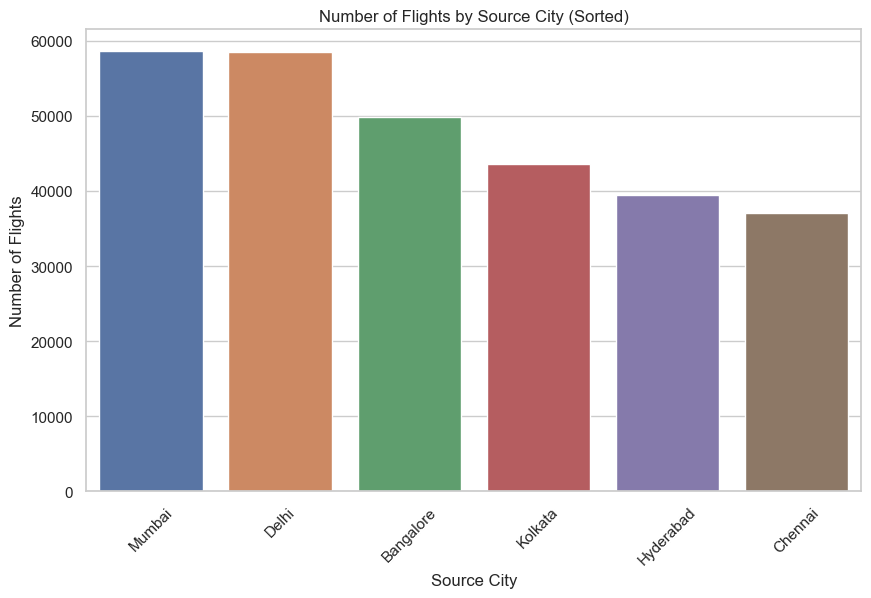

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Calculating the total number of flights per source city
city_counts = df.groupby("source_city")["airline"].count().reset_index()
city_counts = city_counts.sort_values(by="airline", ascending=False)  # Sort by count
# Creating the bar chart
sns.barplot(data=city_counts, x="source_city", y="airline")
plt.title("Number of Flights by Source City (Sorted)")
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

### From the Above we can conclude that mostly flights are run from Delhi 

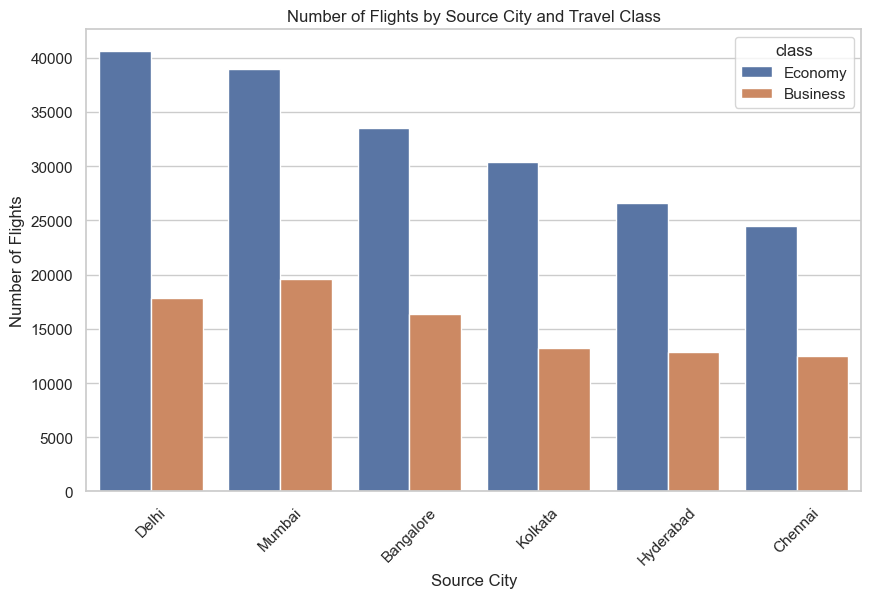

In [46]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
# Creating the bar chart
sns.countplot(data=df, x="source_city", hue="class")
plt.title("Number of Flights by Source City and Travel Class")
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

### From the Above we can conclude that Mostly Peopled preferring economy class travelling

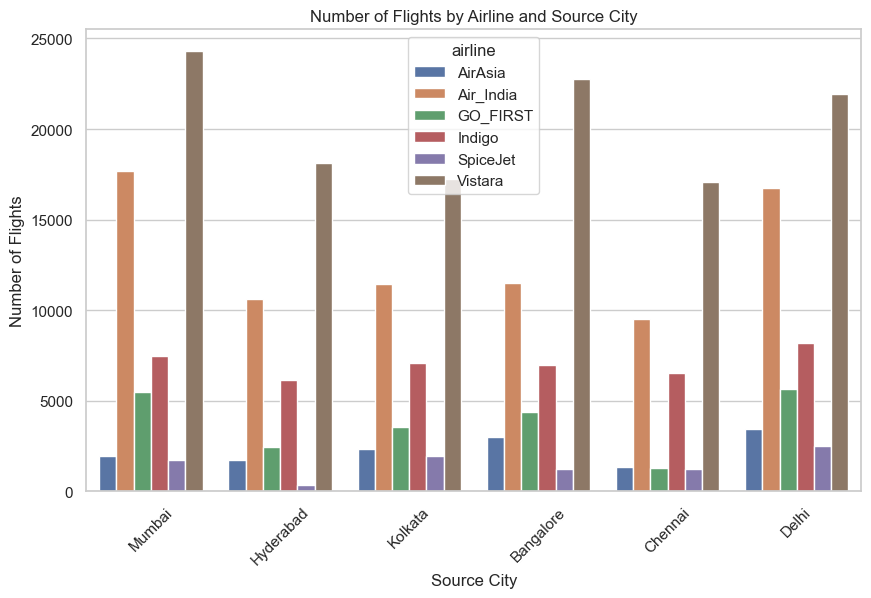

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Sorting airlines alphabetically
flights_sorted = df.sort_values(by="airline")
# Creating the bar chart
sns.countplot(data=flights_sorted, x="source_city", hue="airline")
plt.title("Number of Flights by Airline and Source City")
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

### Vistara Airline has been used in Most of the Cities

In [48]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,yes,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Morning,yes,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Morning,yes,Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,yes,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,yes,Morning,Mumbai,Economy,2.33,1,5955.0


In [49]:
df['stops'].unique()

array(['yes', 'no'], dtype=object)

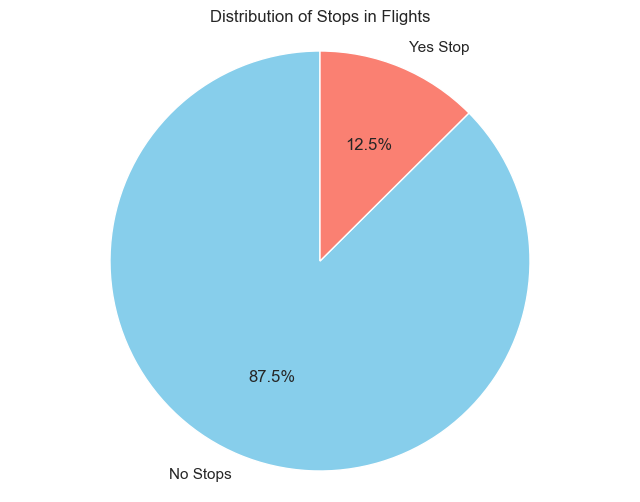

In [50]:
stops_counts = df['stops'].value_counts()
# Creating a pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(stops_counts, labels=['No Stops', 'Yes Stop'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribution of Stops in Flights")
plt.axis('equal') 
plt.show()

### From the above we can conclude that There are no many stops for the flights only 12.5 % are Available

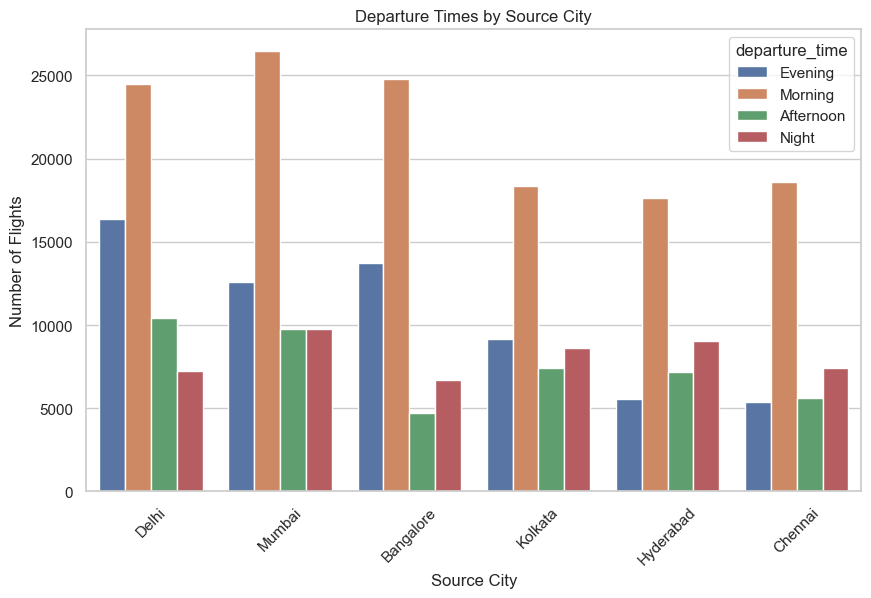

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Creating the bar chart
sns.countplot(data=df, x="source_city", hue="departure_time")
plt.title("Departure Times by Source City")
plt.xlabel("Source City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

### From the Above we can find that Mostly  Flights are Departue at the Morning ...

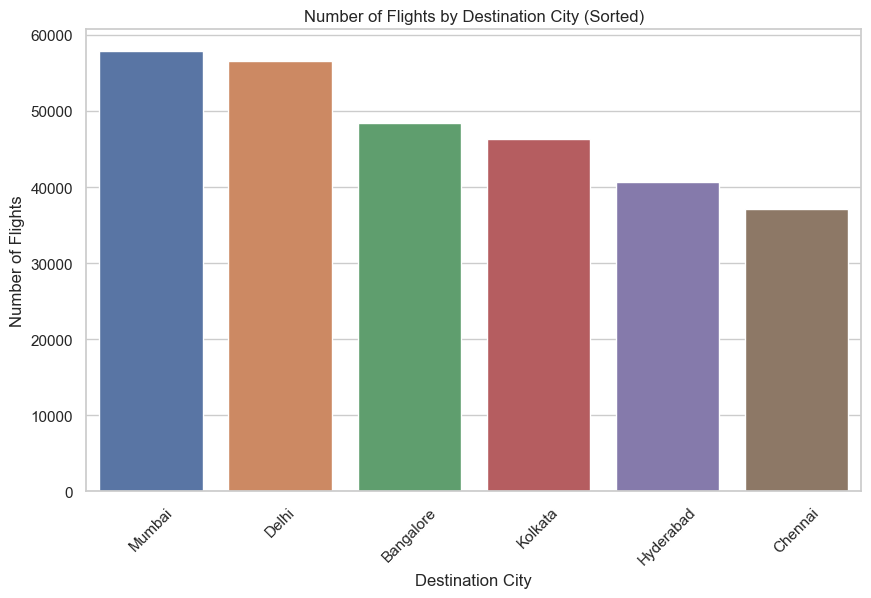

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
city_counts = df.groupby("destination_city")["arrival_time"].count().reset_index()
city_counts = city_counts.sort_values(by="arrival_time", ascending=False)  # Sort by count

# Creating the bar chart
sns.barplot(data=city_counts, x="destination_city", y="arrival_time")
plt.title("Number of Flights by Destination City (Sorted)")
plt.xlabel("Destination City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

### From the above we can conclude that mostly flights are arrived at Mumbai

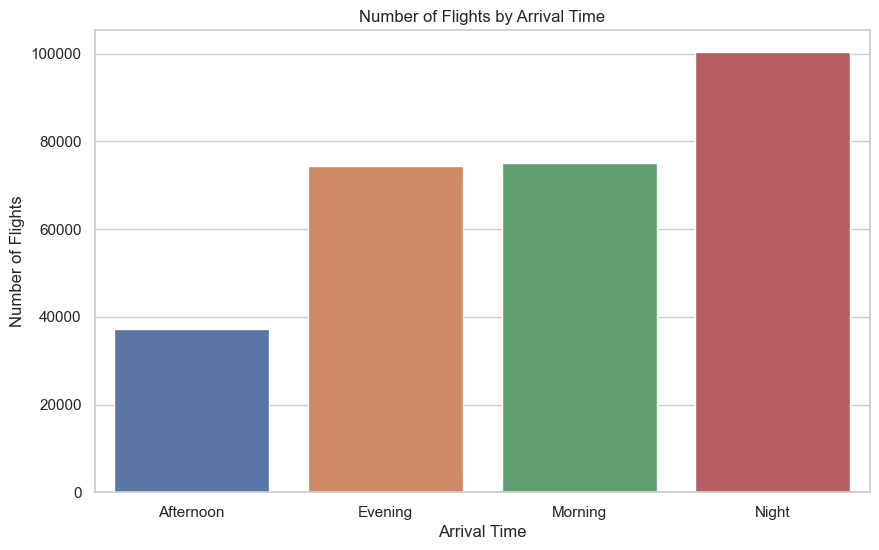

In [53]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6)) 
arrival_counts = df.groupby("arrival_time")["destination_city"].count().reset_index()
arrival_counts = arrival_counts.sort_values(by="arrival_time")  # Sort by arrival time
# Create the bar chart
sns.barplot(data=arrival_counts, x="arrival_time", y="destination_city")
plt.title("Number of Flights by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Number of Flights")
plt.show()

### Mostly Flights Are Arrived at the Night 